<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/IC_1805/IC_1805_version_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install astroquery

     |████████████████████████████████| 6.5MB 4.8MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 2.6MB 45.5MB/s 
  Created wheel for astroquery: filename=astroquery-0.4.1-cp36-none-any.whl size=3831873 sha256=0f87e23fa7d37da667382984c0822be6fea104e699aa4725f981a5abfa7dc9a9
  Stored in directory: /root/.cache/pip/wheels/88/f8/b7/a254cd96e808f708bc0b7d755a8e095c56fbbe94099d7b464f
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around IC1805 center

coordinate = coord.SkyCoord.from_name('IC1805')
print(coordinate)
radius = u.Quantity(0.8, u.deg)
Gaia.ROW_LIMIT = -1
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (38.175, 61.45)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,Gaia DR2 465528726379405696,465528726379405696,247964031,2015.5,38.177112,0.554648,61.450483,0.609400,1.765231,0.769221,2.294829,-1.217923,0.935301,0.826493,1.208420,0.110764,0.039704,-0.548879,0.208537,-0.306737,0.181764,0.092372,-0.152621,-0.059522,0.098671,272,0,270,2,5.630649,416.011017,2.240920,3.162287,31,False,0.032422,1.050447,0.128913,-0.059176,...,365.432711,12.216329,29.913464,18.354902,3.558765,0,1.338949,-0.524485,1.863434,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726376,0.919658,58.803635,43.504977,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001112
1,1635721458409799680,Gaia DR2 465528722077474176,465528722077474176,532618104,2015.5,38.173126,0.195596,61.448828,0.223026,0.485018,0.273150,1.775644,-1.252496,0.308658,-0.557193,0.520266,0.090727,0.080372,-0.703858,0.043827,-0.001763,0.011196,-0.234885,-0.112208,-0.194637,0.132936,350,0,348,2,2.492240,411.750702,0.597085,1.231175,31,False,0.225304,1.251449,0.045914,-0.025778,...,728.827109,9.462338,77.024002,17.605358,2.025694,0,2.002157,0.570684,1.431473,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.725244,0.917403,58.800282,43.504305,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001479
2,1635721458409799680,Gaia DR2 465528726379405440,465528726379405440,1283651393,2015.5,38.172314,0.423892,61.451231,0.538058,0.062564,0.635088,0.098512,1.224278,0.695127,0.686585,1.155529,-0.032334,0.062870,-0.658227,0.092028,-0.183861,0.026078,0.209751,-0.043140,0.064907,-0.108643,286,0,284,2,4.475788,397.799500,1.678573,2.132602,31,False,0.048033,1.173376,0.107343,-0.088620,...,377.982854,8.946186,42.250725,18.318239,3.174750,0,1.303114,-0.424246,1.727360,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723971,0.919477,58.801227,43.506640,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001785
3,1635721458409799680,Gaia DR2 465528726379405056,465528726379405056,181327803,2015.5,38.178915,0.149113,61.450697,0.164303,0.618628,0.205993,3.003147,-0.576566,0.267372,0.189691,0.370243,0.072195,-0.050279,-0.611804,0.154452,-0.259068,-0.004170,0.083585,0.111078,-0.174088,-0.122973,259,0,256,3,2.311016,305.660400,0.484698,1.279618,31,False,0.446387,1.381541,0.036848,-0.009684,...,1064.630714,24.601653,43.274765,17.193922,1.941268,0,1.815165,0.472721,1.342443,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.727092,0.920184,58.804834,43.504799,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.001989
4,1635721458409799680,Gaia D

##### Applying Filter:

In [6]:
all_stars['pmra_over_error'] = abs(all_stars['pmra']/all_stars['pmra_error'])
all_stars['pmdec_over_error'] = abs(all_stars['pmdec']/all_stars['pmdec_error'])

In [7]:
all_stars_filtered = all_stars[all_stars['parallax_over_error'] > 3]

In [8]:
all_stars_filtered = all_stars_filtered[(all_stars_filtered.pmra_error < 0.3) & (all_stars_filtered.pmdec_error < 0.3)]

In [9]:
all_stars_filtered.shape

(16476, 99)

##### Visualizing GAIA data

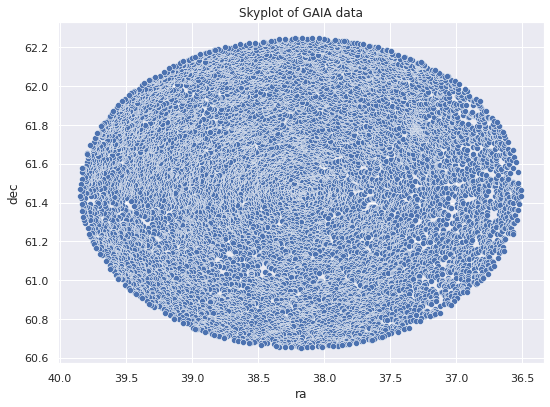

In [10]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x='ra', y='dec', 
                          data = all_stars_filtered)
skyplot.invert_xaxis()
plt.title('Skyplot of GAIA data')
plt.show()

#### Finding Cantat Data

In [11]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [12]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
#catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
#catalogs

In [13]:
## saving only IC 1805 data from Cantat GAIA DR2 paper

cantat_1805 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="IC_1805")
cantat_1805 = cantat_1805[0].to_pandas()
cantat_1805

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,38.153592,61.130890,465452928793998720,0.3521,-0.476,-0.863,NaN,17.732300,2.5744,0.3,IC_1805,38.153596,61.130894
1,38.148031,61.117989,465452894434262528,0.3413,-1.027,-0.231,NaN,16.749500,1.6401,0.3,IC_1805,38.148040,61.117990
2,38.253198,61.651232,465540335670181504,0.4672,-0.453,-0.891,NaN,17.607300,2.2985,0.4,IC_1805,38.253202,61.651235
3,38.300182,61.354941,465480382225858304,0.3881,-0.664,-0.846,NaN,14.744000,1.1821,1.0,IC_1805,38.300188,61.354945
4,38.429289,61.316453,465479248354610944,0.4768,-0.486,-1.095,NaN,17.565599,1.6560,0.4,IC_1805,38.429293,61.316458
...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,38.559873,61.603712,465911562577451264,0.4788,-0.142,-0.669,NaN,17.171600,1.6082,0.2,IC_1805,38.559874,61.603715
452,38.242582,61.758806,465917300660039296,0.3388,-1.648,-0.124,NaN,16.572800,1.2593,0.1,IC_1805,38.242597,61.758806
453,38.561836,61.703254,465913310627212672,0.4396,-0.690,-0.448,NaN,13.340600,0.8793,0.8,IC_1805,38.561842,61.703256
454,38.239475,61.768696,465929047388139008,0.3782,-0.733,0.198,NaN,17.888201,1.8055,0.1,IC_1805,38.239482,61.768695


In [14]:
# renaming the cantat table to match it with gaia_data
cantat_1805 = cantat_1805.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [15]:
# taking the subset of only source_id and PMemb
cantat_1805 = cantat_1805.loc[:,['source_id', 'PMemb']]


In [16]:
# join the two table on source_id
cantat_1805 = all_stars_filtered.join(cantat_1805.set_index('source_id'), on='source_id')

In [17]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_1805 = cantat_1805.dropna(subset=['PMemb'])
cantat_1805

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb
9,1635721458409799680,Gaia DR2 465528726379407232,465528726379407232,584596294,2015.5,38.164814,0.059681,61.449407,0.062212,0.376153,0.079272,4.745121,-0.978910,0.089584,-1.210116,0.129113,-0.014145,-0.029621,-0.738908,0.087967,-0.003134,0.074094,-0.060402,0.004175,0.078398,-0.000019,379,0,378,1,6.278465,571.219360,0.337592,4.655206,31,False,2.403194,1.345949,0.013172,-0.049651,...,15.641562,1.544088,0,2.251506,1.066038,1.185468,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721350,0.916426,58.795684,43.506540,102001,3579.750000,3425.000000,3892.699951,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004912,10.927295,9.372518,0.6
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,13.019259,2.141917,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,9.807837,16.348635,0.3
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,13.057452,1.283723,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,29.000888,22.111231,1.0
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,10.063335,1.210302,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17

In [18]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_1805.to_csv('IC_1805_cantat.csv')
# all_stars.to_csv('IC_1805_Gaia_30m.csv')

In [19]:
cantat_1805.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb
count,4.300000e+02,4.300000e+02,4.300000e+02,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,4.300000e+02,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,5.000000,5.000000,430.000000,5.0,5.00000,5.000000,430.000000,430.000000,430.000000,430.000000,295.000000,295.000000,295.000000,295.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,430.000000,430.000000,430.000000,430.000000
mean,1.635721e+18,4.655530e+17,8.370291e+08,2015.5,38.191660,0.047431,61.471936,0.047749,0.433485,0.062777,9.598937,-0.815610,0.071798,-0.415258,0.104810,-0.016611,0.023739,-0.758200,0.048535,0.020739,0.037829,-0.245586,-0.012964,0.042877,-0.003907,391.183721,35.718605,388.323256,2.860465,1.256707,436.906464,0.076315,0.936484,31.0,40.088203,1.464385,0.010500,-0.045044,44.527907,15.353488,...,8.437867e+04,127.990783,553.230225,14.947571,1.350413,0.106977,1.562723,0.702122,0.860601,-47.089115,2.876392,0.130233,4750.0,2.60000,0.000000,134.724440,0.942425,58.825166,43.521487,100089.352542,4652.797363,4471.136719,4947.840820,2.161606,1.848876,2.521213,1.090662,0.919779,1.280249,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.181338,15.714665,6.331995,0.411629
std,0.000000e+00,1.029493e+14,4.786476e+08,0.0,0.304619,0.025790,0.139722,0.024437,0.054277,0.033141,5.949077,0.336878,0.039379,0.386859,0.052725,0.105667,0.121888,0.033392,0.088065,0.086232,0.086591,0.137120,0.093592,0.094088,0.086630,39.770041,111.892545,39.536123,4.596448,5.035232,196.567184,0.118306,2.719287,0.0,87.453415,0.083095,0.005571,0.032360,4.428969,1.053654,...,5.824498e+05,859.488233,428.931854,1.739034,0.099997,0.309444,0.433157,0.249883,0.195551,16.629325,1.743476,1.288923,500.0,0.74162,0.176777,0.139230,0.146030,0.207340,0.134503,411.490667,658.181335,644.544861,685.960144,0.552312,0.550706,0.458787,0.277141,0.274713,0.229367,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.091125,10.839269,6.077656,0.308020
min,1.635721e+18,4.654529e+17,1.440812e+07,2015.5,37.509657,0.012867,61.117989,0.013695,0.330794,0.016679,3.022010,-1.742702,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.230253,-0.201980,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.7

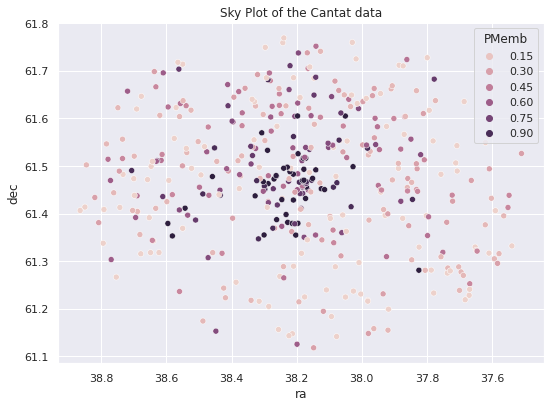

In [20]:
## plotting the skyplot 

skyplot = sns.scatterplot(x = cantat_1805['ra'], y = cantat_1805['dec'], 
                          hue = cantat_1805['PMemb'])
skyplot.invert_xaxis()
plt.title('Sky Plot of the Cantat data')
plt.show()

### Creating, Examining and Processing the Training Data


#### Training Data

In [21]:
# import member dataset
member = cantat_1805.copy()

In [22]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((member['ra'] - center_ra)*np.cos(np.radians(member['dec'])))**2 + (member['dec'] - center_dec)**2 )
member['dist_1805_center'] = distance

In [23]:
# maximum distance of stars in Cantat Data
cantat_radius = max(member.dist_1805_center)
cantat_radius

0.33342855994200765

In [24]:
member['member'] = np.full(len(member), 1)
member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
9,1635721458409799680,Gaia DR2 465528726379407232,465528726379407232,584596294,2015.5,38.164814,0.059681,61.449407,0.062212,0.376153,0.079272,4.745121,-0.978910,0.089584,-1.210116,0.129113,-0.014145,-0.029621,-0.738908,0.087967,-0.003134,0.074094,-0.060402,0.004175,0.078398,-0.000019,379,0,378,1,6.278465,571.219360,0.337592,4.655206,31,False,2.403194,1.345949,0.013172,-0.049651,...,0,2.251506,1.066038,1.185468,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721350,0.916426,58.795684,43.506540,102001,3579.750000,3425.000000,3892.699951,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.004912,10.927295,9.372518,0.6,0.004904,1
12,1635721458409799680,Gaia DR2 465528726370386560,465528726370386560,1265691026,2015.5,38.174604,0.026692,61.455837,0.024871,0.350408,0.032867,10.661463,-0.391319,0.039899,-0.923878,0.056511,0.048533,0.069835,-0.724254,0.110574,0.030926,0.063572,-0.152112,-0.095759,-0.013781,0.093028,363,0,358,5,13.155964,829.465881,0.197810,9.855362,31,False,16.322571,1.582204,0.005890,-0.099154,...,0,1.012991,-0.179126,1.192117,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.723230,0.924154,58.805327,43.510325,102011,5095.633301,4259.000000,6938.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.005842,9.807837,16.348635,0.3,0.005841,1
13,1635721458409799680,Gaia DR2 465528722079282688,465528722079282688,1058312376,2015.5,38.170187,0.016606,61.455589,0.016178,0.437090,0.021993,19.874382,-0.694467,0.023946,-0.802570,0.036297,-0.002689,0.159078,-0.754454,0.121217,0.069633,0.064263,-0.244543,-0.132432,-0.023107,-0.004449,384,0,381,3,-2.515826,310.555786,0.000000,0.000000,31,False,70.747940,1.514005,0.003501,-0.095636,...,0,1.332185,0.578085,0.754100,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.721372,0.923120,58.802553,43.511010,100001,4767.000000,4554.893066,4990.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111,5.413865,4.940792,5.929817,13.636097,11.825031,15.447163,https://gea.esac.esa.int/data-server/datalink/...,,0.006048,29.000888,22.111231,1.0,0.006043,1
16,1635721458409799680,Gaia DR2 465528726379401344,465528726379401344,227921180,2015.5,38.182938,0.022863,61.455661,0.024085,0.405770,0.030849,13.153267,-0.848460,0.033576,-0.766377,0.052442,0.031850,0.131654,-0.754248,0.072089,0.069546,0.017721,-0.282201,-0.115171,0.019322,0.009540,408,408,400,8,5.497458,569.689026,0.000000,0.000000,31,True,338.387543,1.618596,0.005313,-0.070005,...,1,0.776089,0.305677,0.470411,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.726980,0.925506,58.810177,43.508449,100002,6109.666504,5640.000000,6873.419922,1.7587,1.5623,2.0748,0.9335,0.7975,1.0714,200111,14.735189,11.642467,17.291494,272.568817,239.666214,305.471405,https://gea.esac.esa

In [25]:
### adding their distance from the center of the clusters

## IC 1805
center = coord.SkyCoord.from_name('IC1805')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( ((all_stars_filtered['ra'] - center_ra)*np.cos(np.radians(all_stars_filtered['dec'])))**2 + (all_stars_filtered['dec'] - center_dec)**2 )
all_stars_filtered['dist_1805_center'] = distance

In [26]:
non_member = all_stars_filtered[all_stars_filtered['dist_1805_center'] >= 0.7].sample(len(member), random_state = 42)

In [27]:
non_member['member'] = np.full(len(non_member), 0)
non_member.head()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,pmra_over_error,pmdec_over_error,dist_1805_center,member
110394,1635721458409799680,Gaia DR2 465425612802346240,465425612802346240,1210523442,2015.5,38.243417,0.021431,60.659842,0.024470,0.389142,0.030297,12.844187,-2.546513,0.030420,0.152735,0.063061,0.125552,0.068290,-0.820397,-0.074278,-0.145447,-0.031929,-0.084979,-0.120173,0.058612,0.246957,579,0,576,3,-2.318989,495.556915,0.000000,0.000000,31,False,17.350647,1.535108,0.004478,-0.030884,...,1.259486,0,1.194117,0.508997,0.685120,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,135.057357,0.200905,58.379214,42.776801,100001,4900.044922,4846.589844,4951.0,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.885138,2.826056,2.949131,4.323426,3.508638,5.138214,https://gea.esac.esa.int/data-server/datalink/...,,0.790850,83.710989,2.422004,0.790869,0
94835,1635721458409799680,Gaia DR2 465940837071971072,465940837071971072,713165301,2015.5,38.708907,0.154899,62.136125,0.139506,0.412760,0.121648,3.393079,0.238583,0.187735,-1.807095,0.190395,-0.879984,0.208533,-0.743955,0.093043,-0.229393,0.553178,-0.105384,-0.139181,0.155803,-0.525678,330,0,287,43,6.186790,455.005219,0.292307,3.353371,31,False,2.968638,1.528844,0.015261,-0.133729,...,2.693477,0,1.373703,-0.198750,1.572453,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.694834,1.649234,59.527113,44.015124,102011,5095.633301,4284.449707,6938.0,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.731054,1.270853,9.491315,0.730092,0
89791,1635721458409799680,Gaia DR2 465413685672763136,465413685672763136,799085097,2015.5,37.039895,0.104301,60.996415,0.116963,0.574815,0.155409,3.698728,4.099897,0.149101,-0.108509,0.261286,0.035331,0.126228,-0.788398,0.014337,-0.162921,0.017209,-0.138812,-0.165497,0.044236,0.064197,483,0,482,1,3.339031,586.977722,0.332658,1.250251,31,False,0.675060,1.380463,0.023611,-0.031378,...,1.400240,0,1.994562,0.965649,1.028913,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.387520,0.294322,57.853362,43.333367,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,https://gea.esac.esa.int/data-server/datalink/...,,0.710153,27.497452,0.415290,0.713196,0
112706,1635721458409799680,Gaia DR2 465952072716141056,465952072716141056,796792470,2015.5,38.936052,0.030605,62.164059,0.028032,0.434125,0.045645,9.510953,-1.776179,0.049693,0.172501,0.061924,-0.160758,-0.058056,-0.747770,-0.136104,0.134784,0.028224,-0.282104,-0.043084,0.090098,0.049650,442,0,440,2,11.566178,872.048767,0.224193,9.832462,31,False,10.369802,1.577192,0.006464,-0.063501,...,1.243307,1,0.948410,0.373388,0.575022,NaN,NaN,0,NaN,NaN,NaN,NOT_AVAILABLE,134.781702,1.716321,59.676976,43.994614,100002,5289.666504,4723.180176,5423.0,NaN,NaN,NaN,NaN,NaN,NaN,200111,2.452891,2.333757,3.076563,4.243894,3.249488,5.238299,https://gea.esac.esa.int/data-server/data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


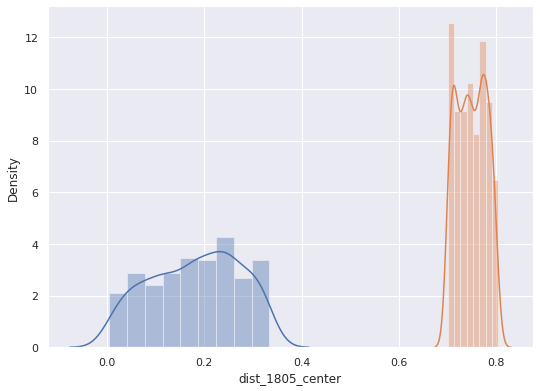

In [28]:
sns.distplot(member['dist_1805_center'])
sns.distplot(non_member['dist_1805_center'])
plt.show()

In [29]:
training_data = pd.concat([member, non_member])

In [30]:
# Examining the descriptive statistics of each column
training_data.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
count,8.600000e+02,8.600000e+02,8.600000e+02,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.0,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,...,859.000000,859.000000,859.000000,860.000000,859.000000,859.000000,859.000000,17.000000,17.000000,860.000000,17.000000,17.000000,17.000000,860.000000,860.000000,860.000000,860.000000,546.000000,546.000000,546.000000,546.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,382.0,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,860.000000,860.000000,860.000000,430.000000,860.000000,860.000000
mean,1.635721e+18,4.723016e+17,8.461452e+08,2015.5,38.275728,0.052922,61.483770,0.053021,0.639922,0.072283,12.748696,0.206111,0.080737,-1.013524,0.118421,0.005529,0.015222,-0.763056,-0.023860,-0.021006,-0.006063,-0.257138,-0.018715,0.113746,0.048784,434.188372,26.240698,431.339535,2.848837,1.873040,540.763489,0.092844,2.340884,31.0,28.566669,1.451444,0.011438,-0.039570,49.450000,15.322093,...,557.016052,15.241671,1.354698,0.094186,1.639535,0.753070,0.886468,-31.847384,1.513077,0.336047,4926.470703,3.088235,-0.088235,134.756324,0.970160,58.883523,43.515452,100067.148352,4550.636230,4379.243164,4842.926270,1.857646,1.582047,2.172533,0.931711,0.783303,1.096881,200111.0,4.249957,3.797857,4.564203,33.287910,28.899084,37.676743,0.465145,41.076793,18.639409,0.411629,0.465005,0.500000
std,0.000000e+00,1.669853e+16,4.832778e+08,0.0,0.739246,0.030245,0.416880,0.028941,0.868471,0.041367,22.194187,6.037036,0.046917,3.746346,0.063435,0.143724,0.117141,0.047081,0.118328,0.104920,0.099637,0.152860,0.094849,0.123955,0.117404,80.924112,102.180723,80.554328,4.551394,7.597164,968.427490,0.148728,24.782441,0.0,72.051613,0.078659,0.006434,0.028606,9.224332,1.117008,...,434.472839,1.620617,0.115964,0.296214,0.428282,0.264688,0.183723,24.922152,1.490792,2.647265,550.317444,0.712287,0.374387,0.358027,0.412446,0.510936,0.401142,357.810357,606.511353,592.977417,634.801514,0.683010,0.654758,0.705200,0.347987,0.331592,0.360566,0.0,5.854216,5.352160,6.231897,212.103027,184.241516,240.004242,0.291937,100.525588,46.423495,0.308020,0.291803,0.500291
min,1.635721e+18,4.652406e+17,1.064124e+07,2015.5,36.527897,0.012867,60.655022,0.013071,0.121956,0.016679,3.010514,-56.019693,0.018846,-49.660337,0.029553,-0.879984,-0.320732,-0.877849,-0.345444,-0.359844,-0.274973,-0.722262,-0.306789,-0.348314,-0.539494,177.000000,0.000000,167.000000,0.000000

In [31]:
# Choosing the features

feature_columns = ['parallax',
                   'pmra', 'pmdec']

features = training_data.loc[:,feature_columns]
targets = training_data['member']

In [32]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,parallax,pmra,pmdec
count,860.000000,860.000000,860.000000
mean,0.639922,0.206111,-1.013524
std,0.868471,6.037035,3.746346
min,0.121956,-56.019691,-49.660336
25%,0.395559,-1.127959,-0.923097
50%,0.457796,-0.744950,-0.427269
75%,0.576170,-0.139687,0.071295
max,20.048050,87.529053,10.580745


In [33]:
targets.value_counts()

1    430
0    430
Name: member, dtype: int64

#### Visualizing Training Data


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


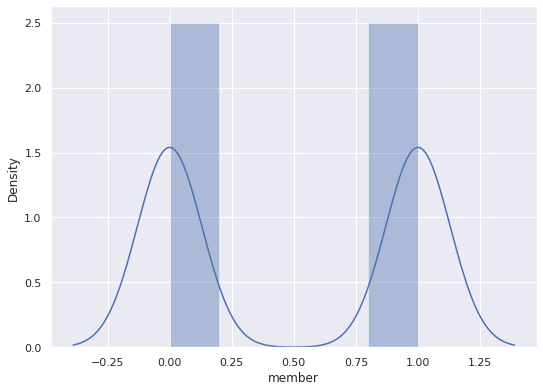

In [34]:
# histogram of PMemb in the training data
sns.distplot(training_set['member'])
plt.show()

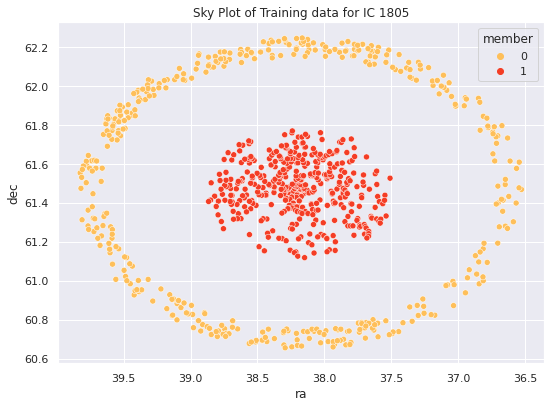

In [35]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', palette='YlOrRd', hue = 'member', data = training_data)
skyplot.invert_xaxis()
plt.title('Sky Plot of Training data for IC 1805')
plt.show()

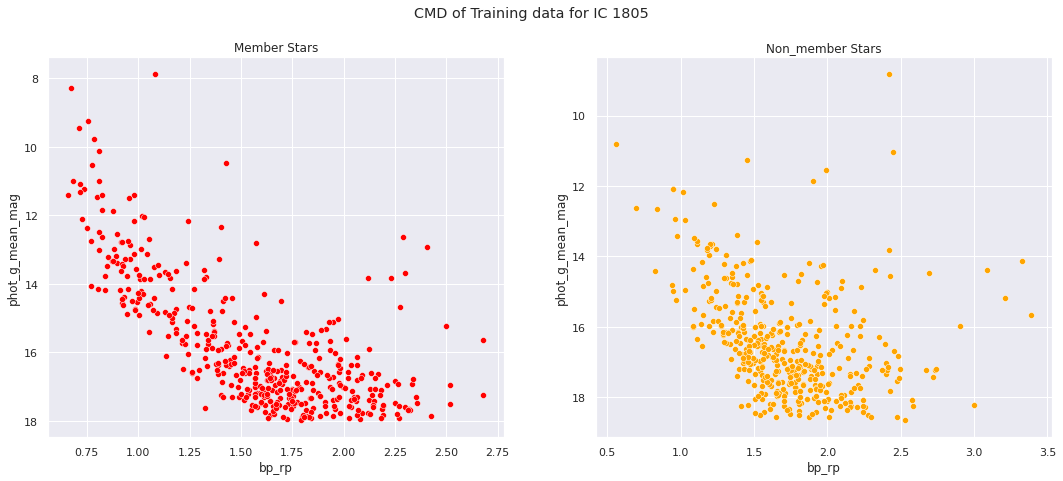

In [36]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
#cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', hue = 'PMemb', data = training_data)
#cmd.invert_yaxis()
#plt.title('')
#plt.show()

# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(18,7))
fig.suptitle('CMD of Training data for IC 1805 ')

sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
axes[0].invert_yaxis()

#plt.show()
sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
axes[1].invert_yaxis()

plt.show()


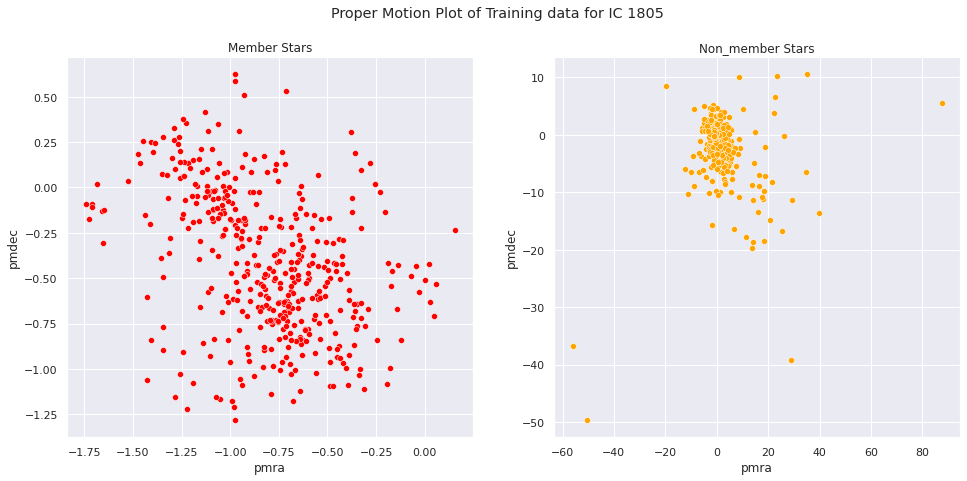

In [37]:
# proper motion plot marked with the membership probabilities of the stars 

fig, axes = plt.subplots(1, 2, figsize=(16,7))
fig.suptitle('Proper Motion Plot of Training data for IC 1805 ')

sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'red',
                data = member, ax = axes[0])
axes[0].set_title('Member Stars')
#plt.show()
sns.scatterplot(x = 'pmra', y='pmdec', palette='YlOrRd', color = 'orange',
                data = non_member, ax = axes[1])
axes[1].set_title('Non_member Stars')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


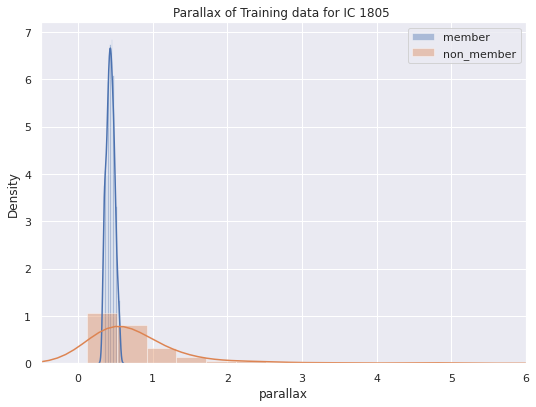

In [38]:
sns.distplot(member.parallax, label='member')
sns.distplot(non_member.parallax, label = 'non_member')
plt.xlim(-0.5,6)
plt.title('Parallax of Training data for IC 1805 ')
plt.legend()
plt.show()

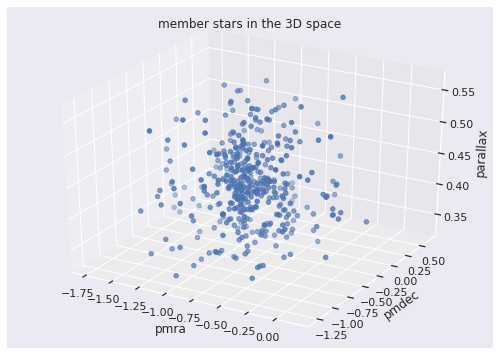

In [39]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.figure().gca(projection='3d')

ax.scatter(member.pmra, member.pmdec, member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('member stars in the 3D space')
plt.show()


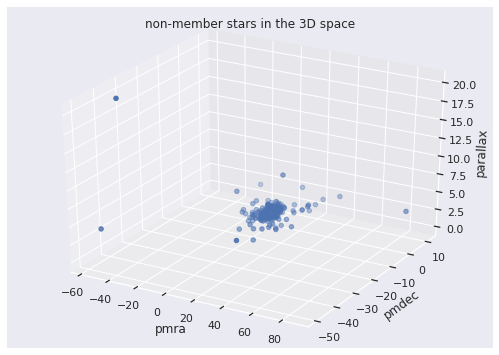

In [40]:
ax = plt.figure().gca(projection='3d')

ax.scatter(non_member.pmra, non_member.pmdec, non_member.parallax)
ax.set_xlabel('pmra')
ax.set_ylabel('pmdec')
ax.set_zlabel('parallax')
plt.title('non-member stars in the 3D space')
plt.show()


#### Check Feature Importance using Random Forest

In [41]:
# Use Random Forest on whole dataset using 100 different trees 
rfc = RandomForestClassifier(n_estimators = 100, oob_score = True)
rfc.fit(features, targets)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfc.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

parallax    0.397058
pmdec       0.304262
pmra        0.298680
dtype: float64

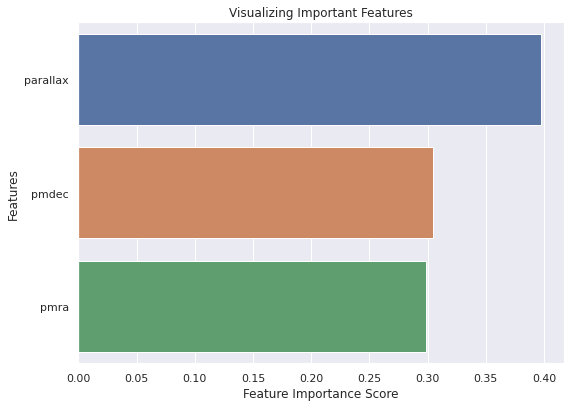

In [43]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model Selection and Accuracy Estimate using Test Data

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, classification_report

In [45]:
from sklearn.model_selection import train_test_split
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
train_features, test_features, train_targets, test_targets = train_test_split(features, 
                                                                                targets, 
                                                                                test_size = 0.3, 
                                                                                random_state=258)

In [46]:
def evaluate_model(model):
    test_predict = model.predict(test_features)
    train_predict = model.predict(train_features)

    print('Model Accuracy:')
    print("Precision on training data: %.3f" % precision_score(train_targets, train_predict))
    print("Precision on testing data: %.3f" % precision_score(test_targets, test_predict))
    print('Accuracy on test data: %.3f' % accuracy_score(test_targets, test_predict))


    sns.heatmap(confusion_matrix(test_targets, test_predict), cmap= 'Greens', annot = True)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print("Classification Report: \n", classification_report(test_targets, test_predict))

#### Random Forest

In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
# Maximum number of levels
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
ccp_alpha = [2**i for i in range(-10,0)]+[0]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'ccp_alpha': ccp_alpha}

random_grid

{'bootstrap': [True, False],
 'ccp_alpha': [0.0009765625,
  0.001953125,
  0.00390625,
  0.0078125,
  0.015625,
  0.03125,
  0.0625,
  0.125,
  0.25,
  0.5,
  0],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}

In [48]:
rfc = RandomForestClassifier(random_state = 42,
                                    oob_score = True)

rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               scoring = 'precision')

In [49]:
rfc_random.fit(train_features, train_targets)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [50]:
rfc_random.best_params_


{'bootstrap': True,
 'ccp_alpha': 0,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.897
Accuracy on test data: 0.930


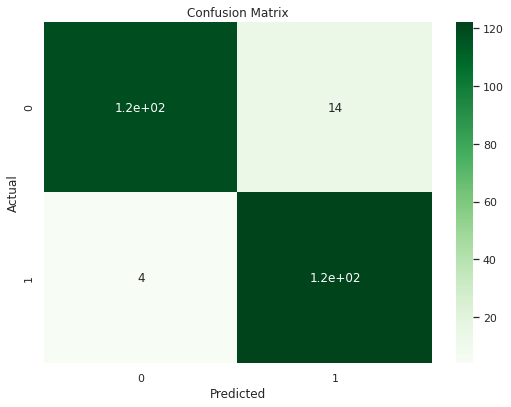

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       132
           1       0.90      0.97      0.93       126

    accuracy                           0.93       258
   macro avg       0.93      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



In [51]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42,
                                    oob_score = True)
base_model.fit(train_features, train_targets)

evaluate_model(base_model)


Model Accuracy:
Precision on training data: 1.000
Precision on testing data: 0.897
Accuracy on test data: 0.930


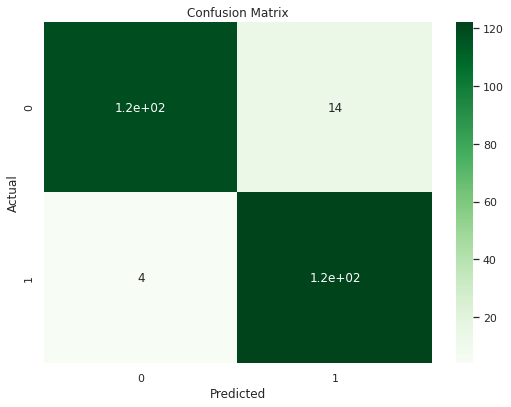

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       132
           1       0.90      0.97      0.93       126

    accuracy                           0.93       258
   macro avg       0.93      0.93      0.93       258
weighted avg       0.93      0.93      0.93       258



In [52]:
best_random = rfc_random.best_estimator_
best_random.fit(train_features, train_targets)

evaluate_model(best_random)


### Prediction for the new stars

In [53]:
# descriptive stats
all_stars_filtered.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1805_center
count,1.647600e+04,1.647600e+04,1.647600e+04,16476.0,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,1.647600e+04,16476.0,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,16476.000000,...,1.639600e+04,16396.000000,16396.000000,16396.000000,16396.000000,16476.000000,16396.000000,16396.000000,16396.000000,513.000000,513.000000,16476.000000,513.000000,513.000000,513.000000,16476.000000,16476.000000,16476.000000,16476.000000,9842.000000,9842.000000,9842.000000,9842.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,3993.000000,6826.0,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,16476.000000,16476.000000,16476.000000,16476.000000
mean,1.635721e+18,4.745134e+17,8.473499e+08,2015.5,38.277998,0.058171,61.478134,0.058120,0.763710,0.080160,14.181739,0.736452,0.088857,-1.364651,0.130443,0.024659,0.023866,-0.759947,-0.058971,-0.038201,-0.032983,-0.249184,-0.024308,0.149999,0.075628,441.763596,14.952901,439.076596,2.686999,2.481332,573.223083,0.119294,2.972093e+00,31.0,16.952055,1.434627,0.012664,-0.035218,50.345047,15.447317,...,2.932104e+04,44.168487,537.555725,15.508718,1.368234,0.078174,1.727117,0.803639,0.923477,-29.328222,1.701927,0.506980,5194.931641,3.400585,-0.069688,134.759535,0.965645,58.881625,43.509983,100045.861004,4398.621094,4222.204102,4703.213379,1.718173,1.452317,2.016088,0.858939,0.721349,1.012681,200111.0,3.051835,2.671828,3.299259,9.321423,7.922087,10.720786,0.523716,52.930420,27.609502,0.523614
std,0.000000e+00,1.864871e+16,4.899460e+08,0.0,0.781402,0.032458,0.411828,0.031498,0.798292,0.044670,22.365736,6.374389,0.050306,5.090733,0.068922,0.145115,0.122291,0.050831,0.099394,0.096720,0.089782,0.165920,0.097114,0.111756,0.103955,73.049265,79.081387,72.680012,3.763839,8.072824,837.303589,0.181559,1.818974e+01,0.0,49.292297,0.071144,0.007128,0.028721,8.326156,1.141818,...,2.705688e+05,506.232040,407.126068,1.440626,0.118161,0.277351,0.405148,0.261407,0.165365,31.029936,2.514762,3.058243,708.495850,0.605039,0.311940,0.379078,0.406363,0.524539,0.405019,295.898093,506.641510,510.700775,508.546204,0.700112,0.700159,0.718938,0.355440,0.352670,0.368293,0.0,4.448740,3.884609,4.827744,76.523438,65.315689,87.876236,0.194517,127.648658,66.774789,0.194464
min,1.635721e+18,4.652404e+17,5.895700e+04,2015.5,36.503672,0.011667,60.651211,0.011563,0.109289,0.016388,3.000325,-56.01

In [54]:
# chosing only GAIA stars close to 0.40 degree radius of the center
all_stars_filtered = all_stars_filtered.dropna(subset = feature_columns)
GAIA_target_stars = all_stars_filtered[all_stars_filtered['dist_1805_center'] <= cantat_radius*2]

In [55]:
# removing the member stars from GAIA data
GAIA_target_stars = pd.concat([GAIA_target_stars, training_data.drop(columns=['PMemb', 'member']), 
                               training_data.drop(columns=['PMemb', 'member'])]).drop_duplicates(keep=False)

In [56]:
# select the set of predictor variables from the new dataset
new_features = GAIA_target_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [57]:
# train the model again using all the features and targets of the previous dataset
# rfc.fit(features, targets)

In [58]:
# estimate the membership classification of the stars
GAIA_target_stars['member'] = best_random.predict(new_features)
GAIA_target_stars['member'].value_counts()

0    10066
1     1104
Name: member, dtype: int64

In [59]:
# estimate the membership probability of the stars
GAIA_target_stars['PMemb'] = best_random.predict_proba(new_features)[:,1]
sum(GAIA_target_stars['PMemb'] >= 0.5)

1106

In [60]:
potentialMember = GAIA_target_stars[GAIA_target_stars['member'] == 1]
len(potentialMember)

1104

In [61]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1805_center,member,PMemb
count,1.104000e+03,1.104000e+03,1.104000e+03,1104.0,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.0,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.000000,...,1101.000000,1101.000000,1101.000000,1104.000000,1101.000000,1101.000000,1101.000000,6.000000,6.000000,1104.000000,6.000000,6.0,6.0,1104.000000,1104.000000,1104.000000,1104.000000,641.000000,641.000000,641.000000,641.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,450.0,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,1104.000000,1104.000000,1104.000000,1104.000000,1104.0,1104.000000
mean,1.635721e+18,4.739779e+17,8.307913e+08,2015.5,38.229281,0.055785,61.449716,0.055552,0.432429,0.076334,7.714996,-0.765096,0.084783,-0.309399,0.124888,0.028156,0.031361,-0.760508,-0.054418,-0.037157,-0.032745,-0.239727,-0.025283,0.148738,0.073814,436.983696,15.257246,434.286232,2.697464,1.648386,508.406189,0.098417,1.611806,31.0,17.412024,1.447528,0.012228,-0.036548,49.790761,15.542572,...,498.326294,15.518719,1.364252,0.057971,1.658930,0.758424,0.900504,-56.768721,0.452071,0.105978,4666.666504,3.0,0.0,134.749236,0.930101,58.835548,43.494134,100038.547582,4529.494629,4358.954590,4810.867188,2.160861,1.860654,2.528554,1.087473,0.931233,1.274902,200111.0,4.567105,4.019548,4.942300,22.939814,19.704987,26.174635,0.467145,12.451437,4.018123,0.467079,1.0,0.852720
std,0.000000e+00,1.819433e+16,4.947481e+08,0.0,0.687207,0.029285,0.357129,0.028546,0.059930,0.039422,4.827981,0.447306,0.045088,0.395166,0.062811,0.133456,0.126115,0.046652,0.087289,0.091309,0.080679,0.168347,0.098194,0.102888,0.090332,64.139592,81.467072,63.626428,3.471808,5.805664,417.406281,0.146713,6.503648,0.0,51.213642,0.075285,0.006505,0.026885,7.301602,1.098915,...,355.673798,1.397180,0.118218,0.237641,0.425554,0.264659,0.178844,14.297783,0.253915,1.495415,408.248291,0.0,0.0,0.338674,0.347355,0.450634,0.358373,271.386667,564.588440,563.000305,567.692688,0.558190,0.570304,0.488296,0.285326,0.289090,0.251447,0.0,5.876599,5.287078,6.354719,138.446198,120.883957,156.022797,0.132615,10.732070,3.904024,0.132613,0.0,0.123932
min,1.635721e+18,4.652689e+17,1.335950e+05,2015.5,36.808733,0.012574,60.789062,0.013377,0.330659,0.017481,3.015218,-1.734716,0.017901,-1.310627,0.029524,-0.434746,-0.360030,-0.889194,-0.375010,-0.343397,-0.251589,-0.681294,-0.261354,-0.192015,-0.275174,197.000000,0.000000,196.000000,0.000000,-10

In [62]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
count,4.300000e+02,4.300000e+02,4.300000e+02,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,5.000000,5.000000,430.000000,5.0,5.00000,5.000000,430.000000,430.000000,430.000000,430.000000,295.000000,295.000000,295.000000,295.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0
mean,1.635721e+18,4.655530e+17,8.370291e+08,2015.5,38.191660,0.047431,61.471936,0.047749,0.433485,0.062777,9.598937,-0.815610,0.071798,-0.415258,0.104810,-0.016611,0.023739,-0.758200,0.048535,0.020739,0.037829,-0.245586,-0.012964,0.042877,-0.003907,391.183721,35.718605,388.323256,2.860465,1.256707,436.906464,0.076315,0.936484,31.0,40.088203,1.464385,0.010500,-0.045044,44.527907,15.353488,...,553.230225,14.947571,1.350413,0.106977,1.562723,0.702122,0.860601,-47.089115,2.876392,0.130233,4750.0,2.60000,0.000000,134.724440,0.942425,58.825166,43.521487,100089.352542,4652.797363,4471.136719,4947.840820,2.161606,1.848876,2.521213,1.090662,0.919779,1.280249,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.181338,15.714665,6.331995,0.411629,0.181335,1.0
std,0.000000e+00,1.029493e+14,4.786476e+08,0.0,0.304619,0.025790,0.139722,0.024437,0.054277,0.033141,5.949077,0.336878,0.039379,0.386859,0.052725,0.105667,0.121888,0.033392,0.088065,0.086232,0.086591,0.137120,0.093592,0.094088,0.086630,39.770041,111.892545,39.536123,4.596448,5.035232,196.567184,0.118306,2.719287,0.0,87.453415,0.083095,0.005571,0.032360,4.428969,1.053654,...,428.931854,1.739034,0.099997,0.309444,0.433157,0.249883,0.195551,16.629325,1.743476,1.288923,500.0,0.74162,0.176777,0.139230,0.146030,0.207340,0.134503,411.490667,658.181335,644.544861,685.960144,0.552312,0.550706,0.458787,0.277141,0.274713,0.229367,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.091125,10.839269,6.077656,0.308020,0.091140,0.0
min,1.635721e+18,4.654529e+17,1.440812e+07,2015.5,37.509657,0.012867,61.117989,0.013695,0.330794,0.016679,3.022010,-1.742702,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.230253,-0.201980,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.749668,159.062073,0.000000,0.000000,31.0,0.77352

#### Visualization

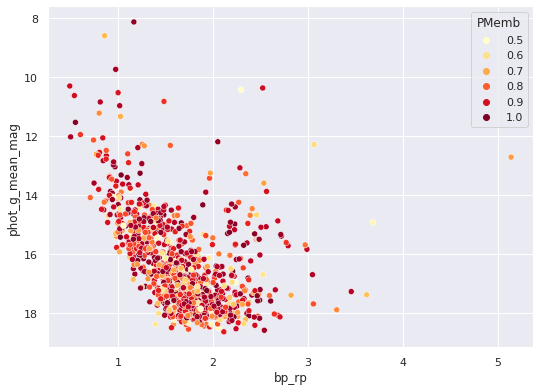

In [63]:
# CMD of predicted members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
cmd.invert_yaxis()

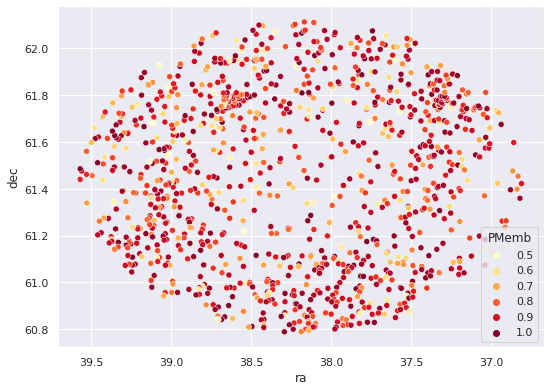

In [64]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )
skyplot.invert_xaxis()

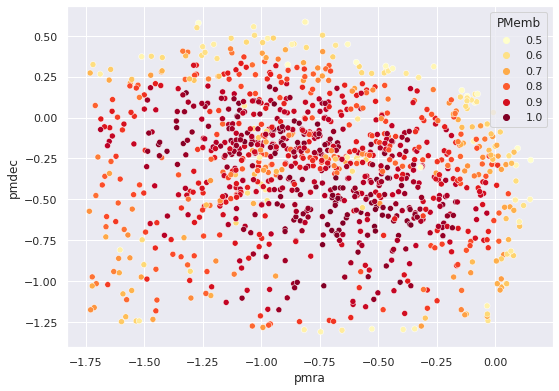

In [65]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )


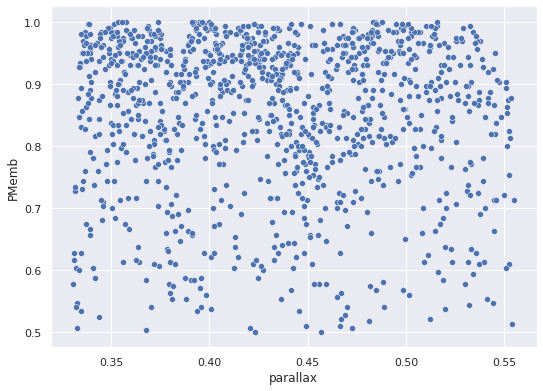

In [66]:
# parallax plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  
                      palette='YlOrRd', data = GAIA_target_stars[GAIA_target_stars['PMemb'] >= 0.5] )

In [67]:
# saving the files as csv
# all_stars.to_csv('gaia_1805_membership_prob.csv')

potentialMember.to_csv('IC_1805_membership_prob.csv')


### Comparing the old and new predicted members

In [68]:
# creating subset for the potential member in previous dataset

concatenated = pd.concat([potentialMember.assign(dataset='New_member'), member.assign(dataset='Old_member')])


In [69]:
concatenated.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,dist_1805_center,member,PMemb
count,1.534000e+03,1.534000e+03,1.534000e+03,1534.0,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.0,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.000000,...,1531.000000,1531.000000,1531.000000,1534.000000,1531.000000,1531.000000,1531.000000,11.000000,11.000000,1534.000000,11.000000,11.000000,11.000000,1534.000000,1534.000000,1534.000000,1534.000000,936.000000,936.000000,936.000000,936.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,667.0,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,1534.000000,1534.000000,1534.000000,1534.000000,1534.0,1534.000000
mean,1.635721e+18,4.716163e+17,8.325399e+08,2015.5,38.218735,0.053443,61.455944,0.053365,0.432725,0.072534,8.243081,-0.779255,0.081143,-0.339072,0.119260,0.015607,0.029225,-0.759860,-0.025559,-0.020928,-0.012962,-0.241369,-0.021830,0.119064,0.052028,424.145372,20.992829,421.402216,2.743155,1.538593,488.363922,0.092221,1.422504,31.0,23.768452,1.452253,0.011744,-0.038930,48.315515,15.489570,...,513.746704,15.358311,1.360366,0.071708,1.631910,0.742611,0.889296,-52.368900,1.554035,0.112777,4704.545410,2.818182,0.000000,134.742285,0.933555,58.832638,43.501801,100054.559829,4568.355469,4394.312012,4854.038086,2.161077,1.857229,2.526420,1.088400,0.927903,1.276456,200111.0,4.845553,4.289477,5.234770,33.120975,28.597073,37.644878,0.387029,13.366162,4.666731,0.386981,1.0,0.729076
std,0.000000e+00,1.589061e+16,4.901409e+08,0.0,0.605014,0.028588,0.311977,0.027672,0.058385,0.038244,5.233715,0.419802,0.043939,0.395599,0.060810,0.127843,0.124952,0.043348,0.098955,0.093575,0.088244,0.160186,0.097054,0.111158,0.095868,61.854861,91.451658,61.454680,3.819714,5.601552,370.408569,0.139651,5.709164,0.0,64.274551,0.077895,0.006304,0.028770,7.031348,1.089394,...,378.347717,1.522295,0.113535,0.260603,0.429743,0.261740,0.184499,15.439566,1.688499,1.440150,430.380371,0.513455,0.111803,0.296776,0.304648,0.397697,0.312443,322.820691,598.071350,591.871582,610.413513,0.555266,0.563487,0.478906,0.282363,0.284427,0.244741,0.0,6.215493,5.653959,6.669468,196.018829,170.540192,221.526337,0.177390,10.858128,4.731162,0.177371,0.0,0.277268
min,1.635721e+18,4.652689e+17,1.335950e+05,2015.5,36.808733,0.012574,60.789062,0.013377,0.330659,0.016679,3.015218,-1.742702,0.017901,-1.310627,0.029524,-0.491299,-0.360030,-0.889194,-0.375010,-0.343397,-0.251589,-0.681294,-0.306789,-0.226258,-0.366241,177.0000

In [70]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,pmra_over_error,pmdec_over_error,PMemb,dist_1805_center,member
count,4.300000e+02,4.300000e+02,4.300000e+02,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,...,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,5.000000,5.000000,430.000000,5.0,5.00000,5.000000,430.000000,430.000000,430.000000,430.000000,295.000000,295.000000,295.000000,295.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,217.0,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0
mean,1.635721e+18,4.655530e+17,8.370291e+08,2015.5,38.191660,0.047431,61.471936,0.047749,0.433485,0.062777,9.598937,-0.815610,0.071798,-0.415258,0.104810,-0.016611,0.023739,-0.758200,0.048535,0.020739,0.037829,-0.245586,-0.012964,0.042877,-0.003907,391.183721,35.718605,388.323256,2.860465,1.256707,436.906464,0.076315,0.936484,31.0,40.088203,1.464385,0.010500,-0.045044,44.527907,15.353488,...,553.230225,14.947571,1.350413,0.106977,1.562723,0.702122,0.860601,-47.089115,2.876392,0.130233,4750.0,2.60000,0.000000,134.724440,0.942425,58.825166,43.521487,100089.352542,4652.797363,4471.136719,4947.840820,2.161606,1.848876,2.521213,1.090662,0.919779,1.280249,200111.0,5.422986,4.849247,5.841270,54.233978,47.036800,61.431141,0.181338,15.714665,6.331995,0.411629,0.181335,1.0
std,0.000000e+00,1.029493e+14,4.786476e+08,0.0,0.304619,0.025790,0.139722,0.024437,0.054277,0.033141,5.949077,0.336878,0.039379,0.386859,0.052725,0.105667,0.121888,0.033392,0.088065,0.086232,0.086591,0.137120,0.093592,0.094088,0.086630,39.770041,111.892545,39.536123,4.596448,5.035232,196.567184,0.118306,2.719287,0.0,87.453415,0.083095,0.005571,0.032360,4.428969,1.053654,...,428.931854,1.739034,0.099997,0.309444,0.433157,0.249883,0.195551,16.629325,1.743476,1.288923,500.0,0.74162,0.176777,0.139230,0.146030,0.207340,0.134503,411.490667,658.181335,644.544861,685.960144,0.552312,0.550706,0.458787,0.277141,0.274713,0.229367,0.0,6.843469,6.323979,7.256820,279.222290,242.473190,316.016998,0.091125,10.839269,6.077656,0.308020,0.091140,0.0
min,1.635721e+18,4.654529e+17,1.440812e+07,2015.5,37.509657,0.012867,61.117989,0.013695,0.330794,0.016679,3.022010,-1.742702,0.019533,-1.281146,0.029553,-0.491299,-0.287339,-0.877849,-0.230253,-0.201980,-0.206680,-0.651846,-0.306789,-0.226258,-0.366241,177.000000,0.000000,167.000000,0.000000,-10.749668,159.062073,0.000000,0.000000,31.0,0.77352

In [71]:
concatenated.dataset.value_counts()

New_member    1104
Old_member     430
Name: dataset, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

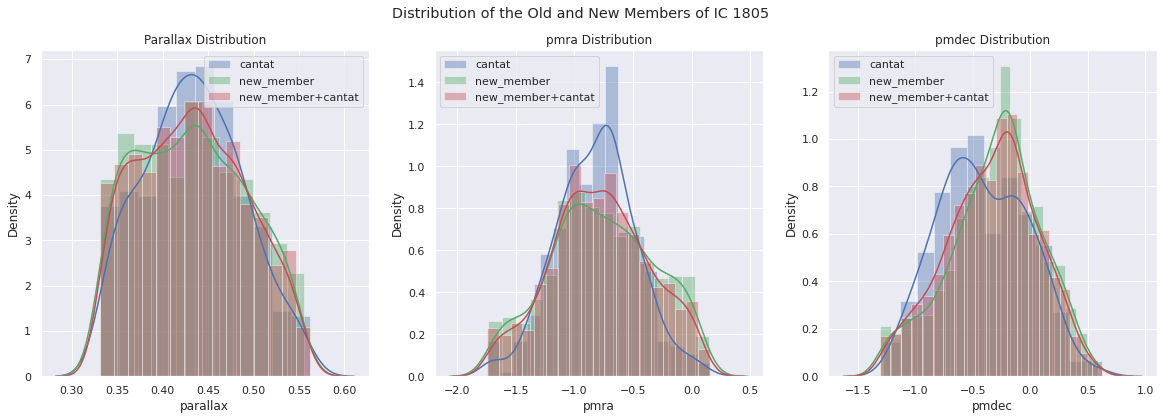

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Distribution of the Old and New Members of IC 1805')


sns.distplot(member['parallax'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[0])
sns.distplot(potentialMember['parallax'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[0])
sns.distplot(concatenated['parallax'], color = 'r', ax=axes[0], kde=True,
             label = 'new_member+cantat')
axes[0].set_title('Parallax Distribution')
axes[0].legend()

sns.distplot(member['pmra'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[1])
sns.distplot(potentialMember['pmra'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[1])
sns.distplot(concatenated['pmra'], color = 'r', ax=axes[1], kde=True,
             label = 'new_member+cantat')
axes[1].set_title('pmra Distribution')
axes[1].legend()

sns.distplot(member['pmdec'], color = 'b', label = 'cantat', 
             kde=True, ax=axes[2])
sns.distplot(potentialMember['pmdec'], color = 'g', label = 'new_member', 
             kde=True, ax=axes[2])
sns.distplot(concatenated['pmdec'], color = 'r', ax=axes[2], kde=True,
             label = 'new_member+cantat')
axes[2].set_title('pmdec Distribution')
axes[2].legend()

plt.show()


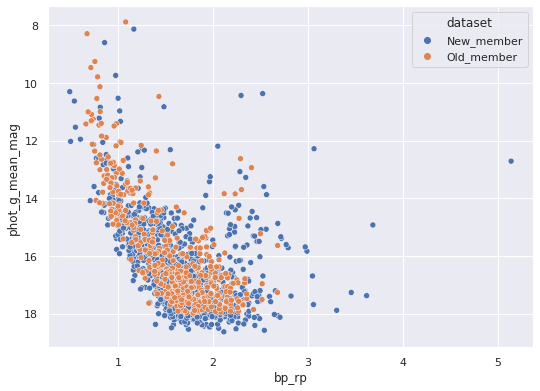

In [73]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

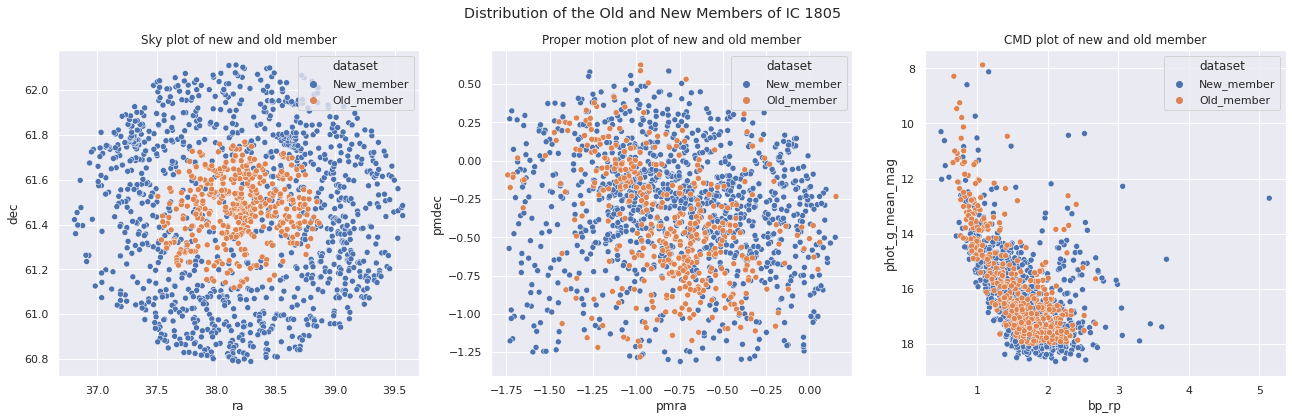

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(22,6))
fig.suptitle('Distribution of the Old and New Members of IC 1805')

skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                hue='dataset', ax=axes[0])
axes[0].set_title('Sky plot of new and old member')

# proper motion plot
sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                hue='dataset', ax=axes[1])
axes[1].set_title('Proper motion plot of new and old member')

cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset', ax = axes[2])
cmd.invert_yaxis()
axes[2].set_title('CMD plot of new and old member')

plt.show()

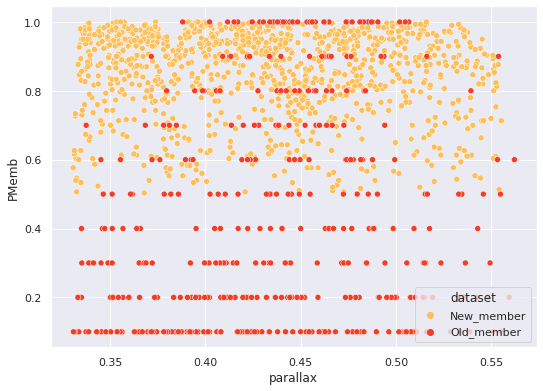

In [75]:
# parallax vs PMemb plot
sns.scatterplot(x = 'parallax', y = 'PMemb',  hue = 'dataset',
                      palette='YlOrRd', data = concatenated )

In [76]:
# pd_prof.ProfileReport(potentialMember)

In [77]:
#files.download('IC_1805_cantat.csv')

#files.download('IC_1805_membership_prob.csv')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


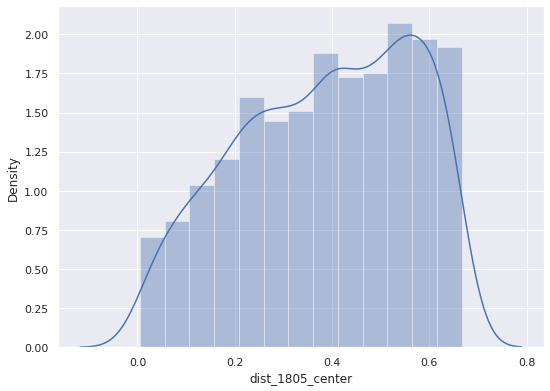

In [78]:
sns.distplot(concatenated['dist_1805_center'])

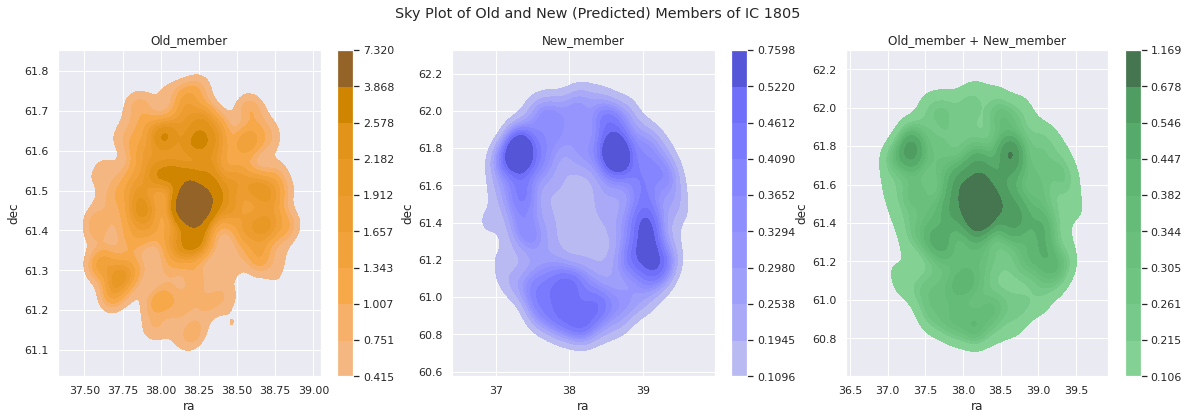

In [79]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Sky Plot of Old and New (Predicted) Members of IC 1805')

sns.kdeplot(x='ra', y='dec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='ra', y='dec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='ra', y='dec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

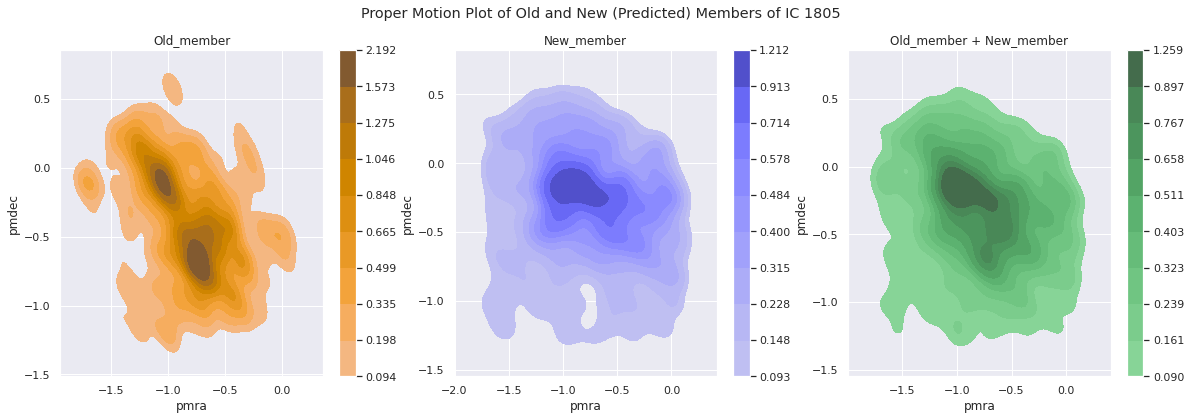

In [80]:

fig, axes = plt.subplots(1, 3, figsize=(20,6))
fig.suptitle('Proper Motion Plot of Old and New (Predicted) Members of IC 1805')

sns.kdeplot(x='pmra', y='pmdec', data = member, shade=True, color = 'orange', 
            bw_method = 0.20, cbar=True, ax=axes[0])
axes[0].set_title('Old_member')

sns.kdeplot(x='pmra', y='pmdec', data = potentialMember, shade=True, color = 'blue', 
            bw_method = 0.20, cbar=True, ax=axes[1])
axes[1].set_title('New_member')

sns.kdeplot(x='pmra', y='pmdec', data = concatenated, shade=True, color = 'g', 
            bw_method = 0.20, cbar=True, ax=axes[2])
axes[2].set_title('Old_member + New_member')

plt.show()

In [81]:
#files.download('IC_1805_cantat.csv')

potentialMember.to_csv('IC_1805_additional_member_prob.csv')
concatenated.to_csv('IC_1805_all_member_prob.csv')

files.download('IC_1805_all_member_prob.csv')
# column 'dataset': Old_member, New_member
# column 'member': 0 and 1
# column 'PMemb': decimal values between 0 to 1

files.download('IC_1805_additional_member_prob.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>